In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
plt.rcParams["figure.figsize"] = (14,6)

In [107]:
confirmed_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_global = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [108]:
confirmed_global.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)
recovered_global.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)
deaths_global.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)

In [109]:
country = "Argentina"

In [110]:
country = "'" + country + "'"
mask = "Country == " + country

In [111]:
C = confirmed_global.query(mask).iloc[:, 4:].T
R = recovered_global.query(mask).iloc[:, 4:].T
D = deaths_global.query(mask).iloc[:, 4:].T

In [112]:
data = pd.concat([C,R,D], join="outer", axis=1)
data.columns = ["C", "R", "D"]
data.index = pd.to_datetime(data.index)
data

,C,R,D
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-06-05,21037,6088,632
2020-06-06,22020,6180,648
2020-06-07,22794,6909,664
2020-06-08,23620,7305,693


In [113]:
data.isna().sum()

C    0
R    0
D    0
dtype: int64

In [114]:
data = data["2020-03-01":]

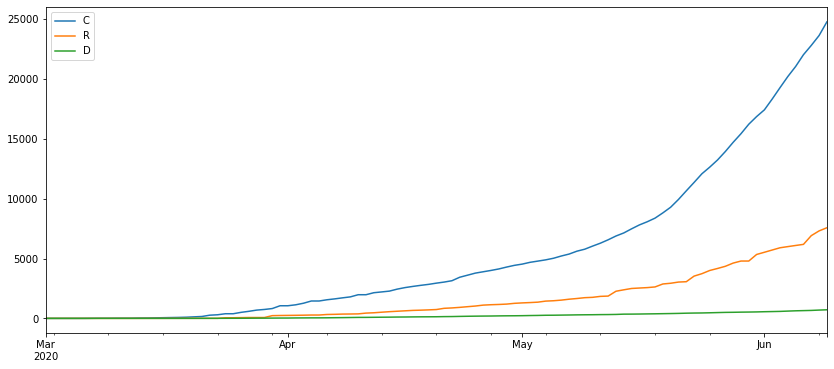

In [115]:
data.plot();

In [116]:
data.isna().sum()

C    0
R    0
D    0
dtype: int64

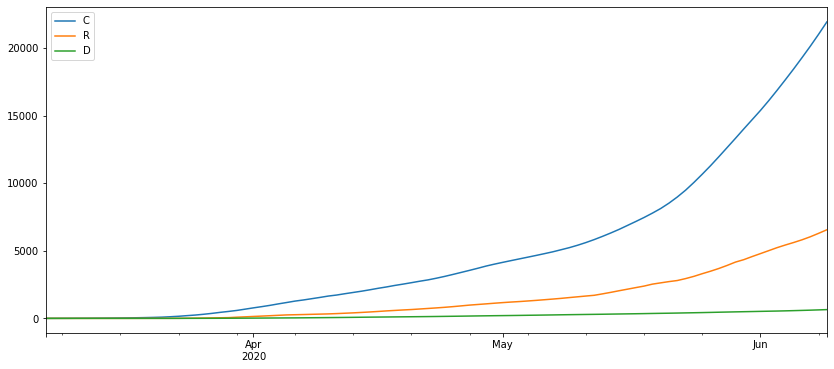

In [117]:
data = data.rolling(window=7).mean().dropna().astype("int64")
data.plot();

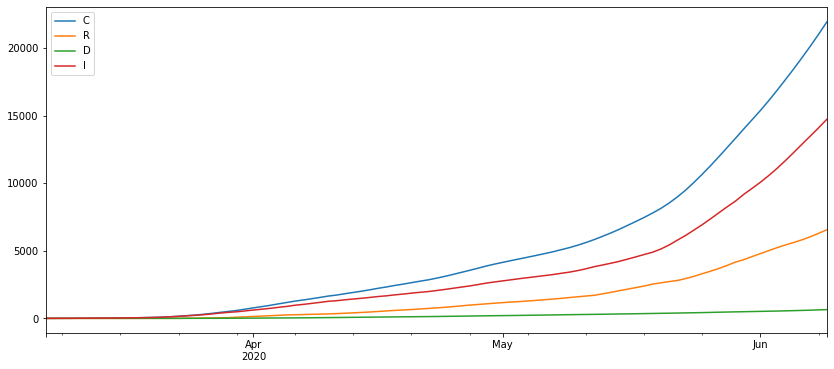

In [118]:
data["I"] = data["C"] - data["R"] - data["D"]
data.plot();

In [119]:
data = data[["I", "R", "D", "C"]]
data = data.reset_index()
data = data.rename(columns={"index": "date"})
data

,date,I,R,D,C
0,2020-03-07,1,0,0,1
1,2020-03-08,3,0,0,3
2,2020-03-09,5,0,0,5
3,2020-03-10,7,0,0,7
4,2020-03-11,10,0,0,10
...,...,...,...,...,...
90,2020-06-05,12280,5618,573,18471
91,2020-06-06,12894,5817,590,19301
92,2020-06-07,13500,6042,608,20150
93,2020-06-08,14111,6297,628,21036


In [120]:
data.to_csv("../data/obs-ar.csv", index=False)